# Laboratorio 1: Uso de `Julia - OptimalControl`

**Nombre:** Sebastián Acuña U. <br>
**Fecha:** 26 de agosto de 2024 <br>
**Profesor:** Héctor Ramírez C. <br>
**Auxiliar:** Diego Olguín W. <br>
**Ayudantes:** Carlos Antil C. y Luis Fuentes C. <br>
**Curso:** [MA4703-1] Control Óptimo: Teoría y Laboratorio

## Parte A: Uso de `Julia`

In [7]:
# Librerías a utilizar

#using Pkg
#Pkg.add("SymPy")
#Pkg.add("Plots")
#Pkg.add("DifferentialEquations")
#Pkg.add("JuMP")
#Pkg.add("NonlinearSolve")
#Pkg.add("OptimalControl")
#Pkg.add("LaTeXStrings")
#Pkg.add("HiGHS")
#Pkg.add("GLPK")
#Pkg.add("Gurobi")
#Pkg.add("Ipopt")
#Pkg.add("NLPModelsIpopt")



using LinearAlgebra
using SymPy
using Plots
using LaTeXStrings
using DifferentialEquations
using JuMP #: Model as Model_J
using HiGHS, GLPK, Gurobi, Ipopt #Nota: Gurobi requiere tener licencia
using NonlinearSolve
using OptimalControl: Model as Model_OC
using NLPModelsIpopt

### Ejercicio 1: Ecuaciones diferenciales ordinarias

Dado el sistema de ecuaciones diferenciales no lineal:

$$
\begin{align*}
\dot{x} &= 6x − 10xy \\
\dot{y} &= -y + \cos(y)
\end{align*}
$$

con condición inicial $(x_0, y_0) = (-5, 1)$.

a) Encuentre la solución general del sistema sin considerar condiciones iniciales, usando la interfaz de `SymPy` en `Julia`.

In [2]:
# Definición de variables (funciones)
@syms x() y() t

# Definición de diferencial
d = Differential(t)

Differential(t, 1)

In [3]:
# Definición de ecuación 1
diffeq1 = d(x(t)) ~ 6*x(t) - 10*x(t)*y(t)

d                                
--(x(t)) = -10*x(t)*y(t) + 6*x(t)
dt                               

In [4]:
# Definición de ecuación 2
diffeq2 = d(y(t)) ~ - y(t) + cos(y(t))

d                           
--(y(t)) = -y(t) + cos(y(t))
dt                          

In [5]:
# Solución sin condiciones iniciales
dsolve((diffeq1, diffeq2))

2-element Vector{Sym{PyCall.PyObject}}:
             Eq(x(t), exp(-2*C1 + exp(-5*C2 - 5*t) + 6/5))
 Eq(y(t), C1 + log(exp(-2*C1 + exp(-5*C2 - 5*t) + 6/5))/2)

sys:1: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.



In [6]:
# Bonus: Solución considerando condiciones iniciales
ics=Dict([x(0) => -5, y(0) => 1])
dsolve((diffeq1, diffeq2), ics=ics)

2-element Vector{Sym{PyCall.PyObject}}:
                                Eq(x(t), -5*exp(-4/5 + 4*exp(-5*t)/5))
 Eq(y(t), log(-5*exp(-4/5 + 4*exp(-5*t)/5))/2 - log(5)/2 + 1 - I*pi/2)

b) Resuelva el sistema de forma numérica en el intervalo de tiempo $[0,5]$ en `Julia` mediante la librería `DifferentialEquations`. Grafique las soluciones.

In [7]:
# MODIFICAR NOMBRES DE VARIABLES

# Definición del sistema de ecuaciones
function system!(du, u, p, t)
    x, y = u
    du[1] = 6*x - 10*x*y
    du[2] = -y + cos(y)
end

# Condiciones iniciales
u0 = [-5.0, 1.0]

# Intervalo de tiempo
t_interval = (0.0, 5.0)

# Definición del problema de EDO
prob = ODEProblem(system!, u0, t_interval)

# Resolución del sistema
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 18-element Vector{Float64}:
 0.0
 0.05855429449914661
 0.14443285717888407
 0.2505347998372857
 0.3875497165598193
 0.5556548808327799
 0.7618553296064641
 1.0081993427968092
 1.2969568563120648
 1.6276697594760348
 1.999534255353294
 2.410294278164147
 2.856401293765302
 3.3333572894045997
 3.8369172625576966
 4.3641181479229
 4.9142657057252235
 5.0
u: 18-element Vector{Vector{Float64}}:
 [-5.0, 1.0]
 [-3.9861510619058436, 0.9744796680334741]
 [-2.9320142675768888, 0.9416555501828392]
 [-2.078941531756455, 0.9075437801551011]
 [-1.3990255305357413, 0.8720583170371955]
 [-0.91192370203149, 0.8387577334898052]
 [-0.5756506313935685, 0.8092296379558547]
 [-0.3548327790092575, 0.7852929279934849]
 [-0.2136725347461858, 0.7674748172814122]
 [-0.12552317385671008, 0.7553646239091116]
 [-0.07154161048869738, 0.7478076658559998]
 [-0.03937396231757693, 0.7434672776536845]
 [-0.020882235476655346, 0.7411612227878418]
 [-0.010683942624783496

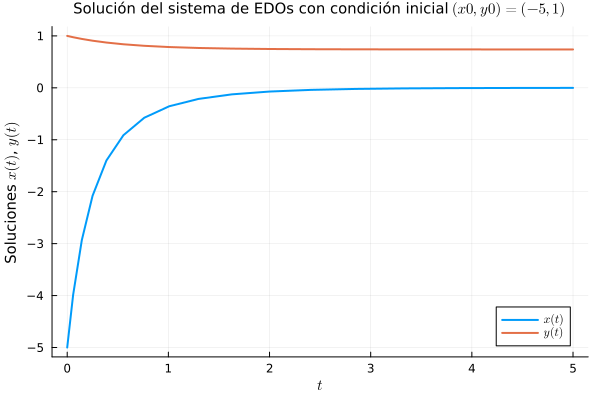

In [8]:
# Gráfico de las soluciones x(t) y y(t)
plot(sol.t, sol[1, :], label=L"x(t)", linewidth=2)
plot!(sol.t, sol[2, :], label=L"y(t)", linewidth=2)
xlabel!(L"t", xguidefont=10)
ylabel!(L"Soluciones $x(t)$, $y(t)$", yguidefont=10)
title!(L"Solución del sistema de EDOs con condición inicial $(x0, y0) = (-5, 1)$", titlefont=10)


c) Utilice el *applet* `pyplane` para dibujar los diagramas de fase del sistema para distintas condiciones iniciales. En particular muestre el mismo punto inicial utilizado antes.

Ver imágenes en Github: https://github.com/sebastianacunau/Labs-Control

### Ejercicio 2: Sistemas dinámicos controlados

Considere el sistema de control en $\mathbb{R}^3$

$$
\begin{equation*}
\dot{x} = Ax(t) + Bu(t) \hspace{1.5cm} \text{con }
A = \begin{pmatrix}
1 & 2 & 3 \\
-3 & 4 & 1 \\
-1 & 2 & 1
\end{pmatrix},
B = \begin{pmatrix}
2 \\
4 \\
1
\end{pmatrix}
\end{equation*}
$$

con condición inicial $x_0 = (0, 0, 0)^\top$. Resuelva el sistema de forma numérica en el intervalo $[0,10]$ en `Julia` mediante `DifferentialEquations` para los siguientes controles de lazo abierto (*open loop*):

$$
u(t) = 1; \ \ \ u(t) = e^{-t}; \ \ \ u(t) = \max(0,t-0.5); \ \ \ u(t) = \mathbf{1}_{\{t \leq 0.75\}}(t) - \mathbf{1}_{\{t > 0.75\}}(t).
$$

Grafique las soluciones.

In [9]:
# Definiciones del problema
A = [1 2 3; -3 4 1; -1 2 1]
B = [2, 4, 1]
tspan = (0.0, 10.0)
x0 = [0.0, 0.0, 0.0]
T = LinRange(0.0, 10.0, 10000)

# Función indicatriz auxiliar
function char(t)
    if t <= 0.75 && t >= 0
        return 1 
    elseif t > 0.75
        return -1
    end
end

# Definición de sistemas a resolver
function function1!(dx, x, p, t)
    dx .= A * x .+ B
end

function function2!(dx, x, p, t)
    dx .= A * x .+ B .* exp(-t)
end

function function3!(dx, x, p, t)
    dx .= A * x .+ B * max(0, t-0.5)
end

function function4!(dx, x, p, t)
    dx .= A * x .+ B * char(t)
end

# Solución de sistemas
prob1 = ODEProblem(function1!, x0, tspan)
prob2 = ODEProblem(function2!, x0, tspan)
prob3 = ODEProblem(function3!, x0, tspan)
prob4 = ODEProblem(function4!, x0, tspan)

sol1 = solve(prob1, Tsit5(), saveat=T)
sol2 = solve(prob2, Tsit5(), saveat=T)
sol3 = solve(prob3, Tsit5(), saveat=T)
sol4 = solve(prob4, Tsit5(), saveat=T)

retcode: Success
Interpolation: 1st order linear
t: 10000-element Vector{Float64}:
  0.0
  0.001000100010001
  0.002000200020002
  0.0030003000300030005
  0.004000400040004
  0.005000500050005001
  0.006000600060006001
  0.0070007000700070005
  0.008000800080008
  0.009000900090009001
  ⋮
  9.991999199919992
  9.992999299929993
  9.993999399939995
  9.994999499949994
  9.995999599959996
  9.996999699969997
  9.997999799979999
  9.998999899989998
 10.0
u: 10000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0]
 [0.002006710661665313, 0.004005903136427272, 0.0010036033769029733]
 [0.0040264800148651116, 0.008022820413402632, 0.0020142241483320743]
 [0.00605936426842499, 0.012050763677762658, 0.003031878294787058]
 [0.00810541975942753, 0.016089744674460518, 0.004056581781665708]
 [0.010164702952176492, 0.020139775039202, 0.005088350556111098]
 [0.012237270438190721, 0.02420086629840069, 0.0061272005469924255]
 [0.014323178936204172, 0.028273029869178037, 0.00717314766490505]
 [0.01642248

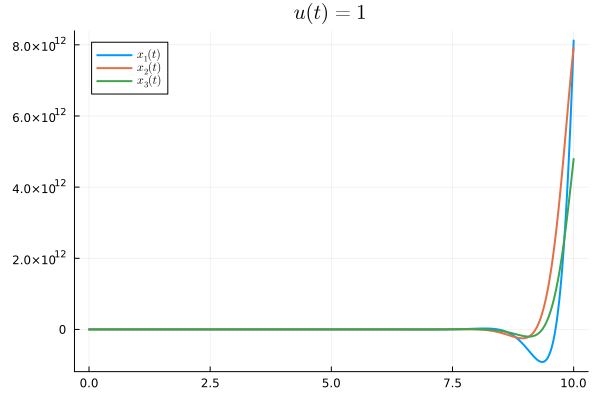

In [10]:
# Gráfico de los resultados
plot(T, sol1[1, :], label=L"x_1(t)", linewidth=2)
plot!(T, sol1[2, :], label=L"x_2(t)", linewidth=2)
plot!(T, sol1[3, :], label=L"x_3(t)", linewidth=2)
title!(L"u(t) = 1")

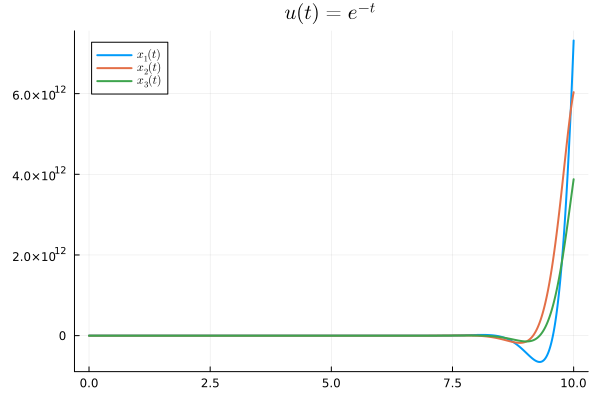

In [11]:
# Gráfico de la solución 2
plot(T, sol2[1, :], label=L"x_1(t)", linewidth=2)
plot!(T, sol2[2, :], label=L"x_2(t)", linewidth=2)
plot!(T, sol2[3, :], label=L"x_3(t)", linewidth=2)
title!(L"u(t) = e^{-t}")

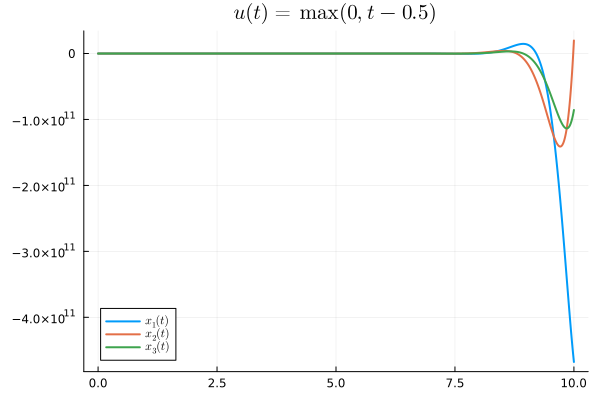

In [12]:
# Gráfico de la solución 3
plot(T, sol3[1, :], label=L"x_1(t)", linewidth=2)
plot!(T, sol3[2, :], label=L"x_2(t)", linewidth=2)
plot!(T, sol3[3, :], label=L"x_3(t)", linewidth=2)
title!(L"u(t) = \max(0, t-0.5)")

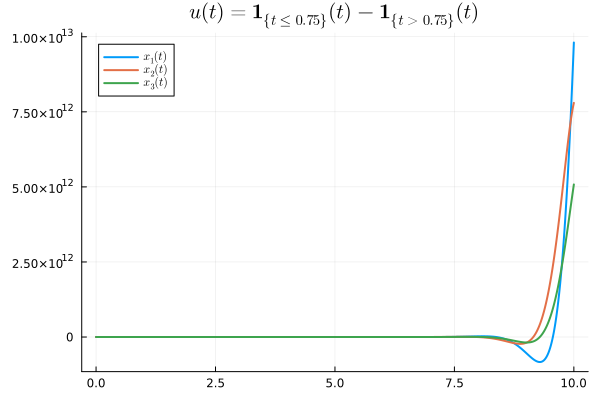

In [13]:
# Gráfico de la solución 4
plot(T, sol4[1, :], label=L"x_1(t)", linewidth=2)
plot!(T, sol4[2, :], label=L"x_2(t)", linewidth=2)
plot!(T, sol4[3, :], label=L"x_3(t)", linewidth=2)
title!(L"u(t) = \mathbf{1}_{\{t \leq 0.75\}}(t) - \mathbf{1}_{\{t > 0.75\}}(t)")

### Ejercicio 3: Optimización lineal

Resuelva con `Julia` el siguiente problema de programación lineal (PL). Utilice `JuMP`, explore los distintos métodos disponibles y muestre la solución que entrega cada método.

\begin{align*}
\begin{cases}
\displaystyle \max_{(x,y,z) \in \mathbb{R}^3} & f(x,y,z) = 5x-y-6z \\ \hspace{0.55cm} \textrm{s.a}
& -x + 2y - 9z = 6 \\
& 6x + 3y + 4z \geq 0 \\
& 5x + z \leq 2 \\
& 2x - 3y + z \leq 3 \\
& x \geq 0
\end{cases}
\end{align*}

Utilizando el solver `HiGHS`

In [14]:
# Crear el modelo utilizando HiGHS
model_highs = Model(HiGHS.Optimizer)

# Definir las variables de decisión
@variable(model_highs, x >= 0)
@variable(model_highs, y)
@variable(model_highs, z)

# Definir la función objetivo
@objective(model_highs, Max, 5x - y - 6z)

# Definir las restricciones
@constraint(model_highs, -x + 2y - 9z == 6)
@constraint(model_highs, 6x + 3y + 4z >= 0)
@constraint(model_highs, 5x + z <= 2)
@constraint(model_highs, 2x - 3y + z <= 3)

# Resolver el problema
optimize!(model_highs)

# Obtener y mostrar los resultados
println("HiGHS Solver Results:")
println("Óptimo x = ", value(x))
println("Óptimo y = ", value(y))
println("Óptimo z = ", value(z))
println("Valor óptimo de la función objetivo = ", objective_value(model_highs))


Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 9e+00]
  Cost   [1e+00, 6e+00]
  Bound  [0e+00, 0e+00]
  RHS    [2e+00, 6e+00]
Presolving model
4 rows, 3 cols, 11 nonzeros  0s
3 rows, 2 cols, 6 nonzeros  0s
3 rows, 2 cols, 6 nonzeros  0s
Presolve : Reductions: rows 3(-1); columns 2(-1); elements 6(-5)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -2.6272499968e+03 Ph1: 3(4464.56); Du: 2(4.875) 0s
          3    -7.3500000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 3
Objective value     :  7.3500000000e+00
HiGHS run time      :          0.02
HiGHS Solver Results:
Óptimo x = 0.55
Óptimo y = -0.10000000000000009
Óptimo z = -0.75
Valor óptimo de la función objetivo = 7.35


Utilizando el solver `GLPK`

In [15]:
# Crear el modelo utilizando GLPK
model_glpk = Model(GLPK.Optimizer)

# Definir las variables de decisión
@variable(model_glpk, x >= 0)
@variable(model_glpk, y)
@variable(model_glpk, z)

# Definir la función objetivo
@objective(model_glpk, Max, 5x - y - 6z)

# Definir las restricciones
@constraint(model_glpk, -x + 2y - 9z == 6)
@constraint(model_glpk, 6x + 3y + 4z >= 0)
@constraint(model_glpk, 5x + z <= 2)
@constraint(model_glpk, 2x - 3y + z <= 3)

# Resolver el problema
optimize!(model_glpk)

# Obtener y mostrar los resultados
println("GLPK Solver Results:")
println("Óptimo x = ", value(x))
println("Óptimo y = ", value(y))
println("Óptimo z = ", value(z))
println("Valor óptimo de la función objetivo = ", objective_value(model_glpk))


GLPK Solver Results:
Óptimo x = 0.55
Óptimo y = -0.1000000000000001
Óptimo z = -0.75
Valor óptimo de la función objetivo = 7.35


Utilizando el solver `Gurobi`

In [16]:
# Crear el modelo utilizando Gurobi
model_gurobi = Model(Gurobi.Optimizer)

# Definir las variables de decisión
@variable(model_gurobi, x >= 0)
@variable(model_gurobi, y)
@variable(model_gurobi, z)

# Definir la función objetivo
@objective(model_gurobi, Max, 5x - y - 6z)

# Definir las restricciones
@constraint(model_gurobi, -x + 2y - 9z == 6)
@constraint(model_gurobi, 6x + 3y + 4z >= 0)
@constraint(model_gurobi, 5x + z <= 2)
@constraint(model_gurobi, 2x - 3y + z <= 3)

# Resolver el problema
optimize!(model_gurobi)

# Obtener y mostrar los resultados
println("Gurobi Solver Results:")
println("Óptimo x = ", value(x))
println("Óptimo y = ", value(y))
println("Óptimo z = ", value(z))
println("Valor óptimo de la función objetivo = ", objective_value(model_gurobi))


Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-26
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 21.3.0 21D62)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 4 rows, 3 columns and 11 nonzeros
Model fingerprint: 0x50f705bc
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 4 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.3500000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  7.350000000e+00

User-callback calls 53, time in user-callback 0.01 sec
Gurobi Solver Results:
Óptimo x = 0.55
Óptimo y = -0.10000000000000009
Óp

### Ejercicio 4: Optimización no lineal

Usted desea construir un gabinete de PC, en forma de paralelepípedo rectangular, con el mayor volumen posible. Por razones de refrigeración debe cumplir que el área de su base sea superior a 150 cm$^2$ y debido al tamaño de su escritorio, la altura del gabinete más el perímetro de su base no puede superar los 80 cm. Escriba un modelo matemático para este problema y resuélvalo utilizando un *solver* de optimización no lineal de `JuMP`.

Denotando por $a$, $b$ y $c$ las medidas de largo, ancho y alto del parelelepípedo, tenemos el siguiente problema de maximización para la compañía:

\begin{align*}
\max \quad & abc \\
\text{s.a} \quad & ab \geq 150 \\
& 2a+ 2b + c \leq 80 \\
& a,b,c \geq 0
\end{align*}

In [17]:
# Crear el modelo utilizando el solver Ipopt
model = Model(Ipopt.Optimizer)

# Definir las variables de decisión
@variable(model, a >= 0)
@variable(model, b >= 0)
@variable(model, c >= 0)

# Definir la función objetivo
@objective(model, Max, a * b * c)

# Definir las restricciones
@constraint(model, ab_constraint, a * b >= 150)
@constraint(model, linear_constraint, 2a + 2b + c <= 80)

# Resolver el problema
optimize!(model)

# Obtener los resultados
a_opt = value(a)
b_opt = value(b)
c_opt = value(c)
opt_val = objective_value(model)

# Mostrar los resultados
println("Óptimo a = ", a_opt)
println("Óptimo b = ", b_opt)
println("Óptimo c = ", c_opt)
println("Valor óptimo de la función objetivo = ", opt_val)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        7

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

### Ejercicio 5: Cónicas

Encuentre los puntos de intersección $(x, y)$ de las siguientes cónicas:

* $(x − 5)^2 + \frac{1}{2}y^2 = 10$
* $2x+3(y+2)^2 =12$

Para esto, utilice `NonlinearSolve` y grafique.

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase /Users/sebastianacunaurzua/.julia/packages/SciMLBase/nftrI/src/performance_warnings.jl:33


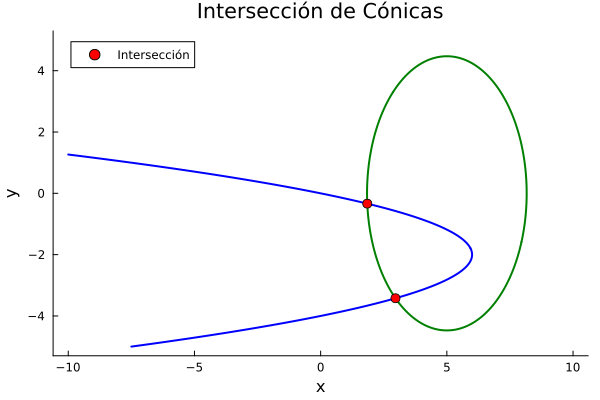

In [18]:
# Definición de las funciones cónicas
function conicas!(F, x, p)
    F[1] = (x[1] - 5)^2 + (1/2) * x[2]^2 - 10
    F[2] = 2 * x[1] + 3 * (x[2] + 2)^2 - 12
end

# Resolución de las ecuaciones no lineales usando NonlinearSolve
prob1 = NonlinearProblem(conicas!, [0.0, 0.0], [])
sol1 = solve(prob1)

prob2 = NonlinearProblem(conicas!, [-5.0, -5.0], [])
sol2 = solve(prob2)

pts_inter = [sol1.u, sol2.u]

# Extraer las coordenadas de los puntos de intersección
x_inter = [pts_inter[i][1] for i in 1:2]
y_inter = [pts_inter[i][2] for i in 1:2]

# Definición del espacio para las gráficas
x = LinRange(-10, 10, 1000)
y = LinRange(-5, 5, 1000)
X, Y = [x[i] for i in 1:length(x)], [y[j] for j in 1:length(y)]

# Función para calcular el valor de las cónicas en una malla
function elipse1(X, Y)
    return (X .- 5).^2 .+ (1/2) .* Y.^2 .- 10
end

function elipse2(X, Y)
    return 2 .* X .+ 3 .* (Y .+ 2).^2 .- 12
end

# Gráfico de las elipses y los puntos de intersección
contour(x, y, elipse1.(X', Y), levels=[0], color=:green, linewidth=2, label="Elipse 1", colorbar=false)
contour!(x, y, elipse2.(X', Y), levels=[0], color=:blue, linewidth=2, label="Elipse 2", colorbar=false)
scatter!(x_inter, y_inter, color=:red, label="Intersección", markersize=5)

plot!(legend=:topleft, grid=false, xlabel="x", ylabel="y", title="Intersección de Cónicas")


In [19]:
# Imprimir los puntos de intersección
println("Puntos de intersección de las cónicas:")

for i in 1:length(pts_inter)
    println("Punto $(i): (x, y) = (", round(pts_inter[i][1], digits=4), ", ", round(pts_inter[i][2], digits=4), ")")
end

Puntos de intersección de las cónicas:
Punto 1: (x, y) = (1.8467, -0.336)
Punto 2: (x, y) = (2.9645, -3.4225)


## Parte B: Uso de `OptimalControl`

### Ejercicio 6: Control óptimo

Considere el siguiente problema de control óptimo:

$$
\min_{u(.)} \int_{0}^{t_f} u(t)y(t)dt; \quad \ddot{y}(t) = u^3(t); \quad y(t) \geq 0; \quad -1 \leq u(t) \leq 1
$$

con $t_f = 50, \ y(0)=0, \ \dot{y}(0)=1, \ y(t_f) = 1, \ \dot{y}(t_f) = 1.5$. 

a) Identifique el sistema que modela este problema, viéndolo como un sistema de 2 ecuaciones de primer orden. Identifique las funciones $J, \ell, f, \Phi$ y $g$.

Dado que $\ddot{y}(t) = u^3(t)$, podemos reescribirlo como un sistema de primer orden:

\begin{align*}
\dot{y}_1(t) &= y_2(t), \\
\dot{y}_2(t) &= u^3(t).
\end{align*}

En formato matricial, el sistema de ecuaciones diferenciales se puede expresar como:

$$
\dot{y}(t) =
\begin{pmatrix}
\dot{y}_1(t) \\
\dot{y}_2(t)
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
0 & 0
\end{pmatrix}
\begin{pmatrix}
y_1(t) \\
y_2(t)
\end{pmatrix}
+
\begin{pmatrix}
0 \\
1
\end{pmatrix}
u^3(t)
$$


Las funciones son:
* $J \equiv 0$
* $\ell(t, u(t), y(t)) = u(t)y(t)$
* $\Phi_l = [0,1]$
* $\Phi_u = [1, 1.5]$
* No hay $g$

b) Resuelva este problema y grafique los resultados encontrados.

In [11]:
using OptimalControl
using NLPModelsIpopt

# Define el modelo de control óptimo
ocp = @def begin
    t ∈ [0, 50], time
    y ∈ R^2, state
    u ∈ R, control

    # Definición de la dinámica
    ∂(y)(t) == [y[2](t), (u^3)(t)]

    # Restricciones sobre el control y la variable de estado
    -1 <= u(t) <= 1
    y[1](t) >= 0

    # Condiciones de frontera
    y(0) == [0, 1]
    y(50) == [1, 1.5]

    # Definición de la función objetivo
    ∫(u(t) * y[1](t)) → min
end

# Resolver el problema
sol = solve(ocp, grid_size=50)

# Mostrar los resultados
println("Optimal Control Solution:")
println("Control function u(t): ", sol.u)
println("State trajectory y(t): ", sol.y)


This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:      705
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      102

Total number of variables............................:      204
                     variables with only lower bounds:       51
                variables with lower and upper bounds:       51
                     variables with only upper bounds:        0
Total number of equality constraints.................:      155
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 1.40e+00 5.42e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

ErrorException: type OptimalControlSolution has no field u

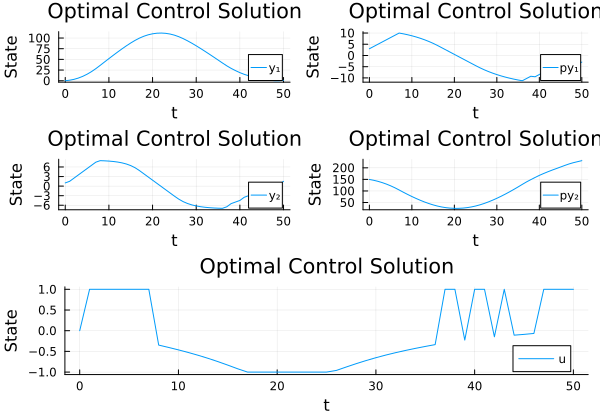

In [12]:
plot(sol, title="Optimal Control Solution", xlabel="Time", ylabel="State", legend=:bottomright)

c) Considere ahora que se quiere cambiar la función objetivo a

$$
\int_{0}^{t_f} u(t)y(t) + z(t)dt
$$

con

$$
z(t) = \int_{0}^{t} y(t)
$$

Determine el nuevo sistema, identificando la dinámica y condición inicial de $z$. Resuelva el problema y grafique los resultados.